<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from math import e
from sklearn.metrics import classification_report
from sympy import diff
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [11]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [12]:

train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [13]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [14]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [179]:
learning_rate = 0.001
epochs = 5
inner_feachers = 4
in_feachers = 784
batch_size = 128 

w1 = np.random.rand(in_feachers, inner_feachers) * learning_rate
b1 = 0 
w2 = np.random.rand(inner_feachers, 1) * learning_rate
b2 = 0 

loss_func = 0

losses = []

for n_epoch in range(epochs):
    grad_prev = None
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:

        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)
        if x.shape[0] == 108:
          continue

        z1 = np.dot(x, w1) + b1
        a1 = (np.e**z1 - np.e**(-z1))/(np.e**z1 + np.e**(-z1))
        z2 = np.dot(a1, w2)+ b2

        # forward
        # рассчет bce

        my_y = 1/(1 + np.exp(-z2))
        loss = -np.mean(y*np.log(my_y) + (1-y)*np.log(1-my_y))
        losses.append(loss)
          
        # backward

        dl_dy = ((1-y)/(1-my_y) - y**2/my_y)
        dl_dz2 = (dl_dy @ my_y.T @ (1-my_y)) 
        dl_da1 = (dl_dz2 @ w2.T)
        dl_dw2  =  ( a1.T @ dl_dz2)/x.shape[0]
        dl_db2 =  np.mean(dl_dz2)/x.shape[0]

       
        dl_dz1 = (dl_da1 * (1-a1**2))
        dl_dw1 = (x.T @ dl_dz1)/x.shape[0]
        dl_db1 =  np.mean(dl_dz1)/x.shape[0]

        w1 = w1 - dl_dw1*learning_rate
        w2 = w2 - dl_dw2*learning_rate
        b1 = b1 - dl_db1*learning_rate
        b2 = b1 - dl_db2*learning_rate



Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5


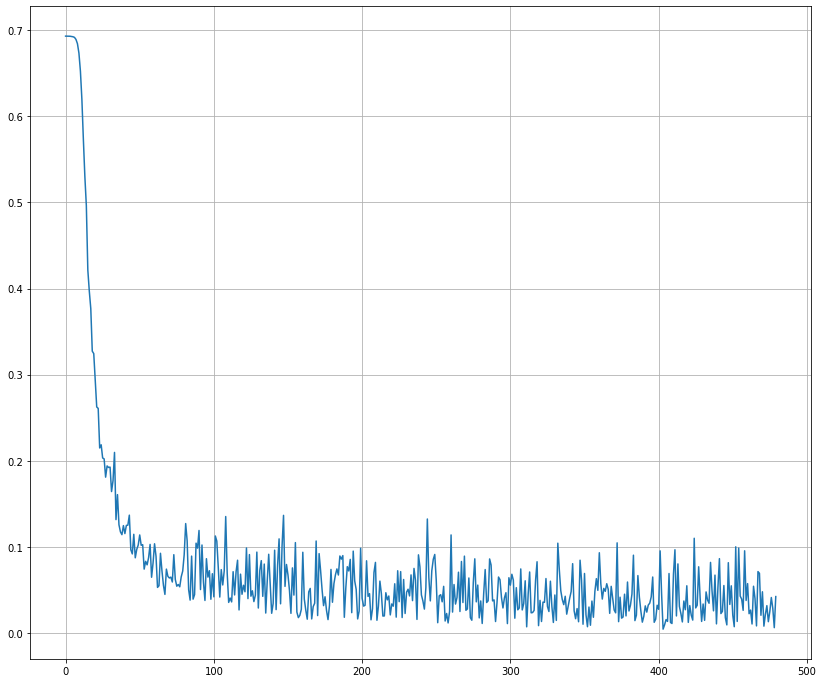

In [180]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()